<div style="background-color: #7b6832; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
  <h1 style="color: cyan; font-size: 40px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">SPORTS PROJECT STORY
</h1>
</div>

<div style="background-color: #3b6832; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
  <h1 style="color: cyan; font-size: 20px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">TECH TITANS
</h1>
</div>

In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
from scipy import stats
from scipy.stats import zscore
import seaborn as sns

from scipy.stats.mstats import winsorize 
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.decomposition import PCA  # Import PCA correctly
from sklearn.impute import KNNImputer

C:\Users\nagad\AppData\Local\Temp\ipykernel_11720\3780974715.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# PROBLEM STATEMENT 5

### FEATURE ENGINEERING

In [3]:
df=pd.read_csv("new_dataset.csv")

df['GoalContribution'] = df['Goals'] + df['Assists']
df['BMI'] = df['Weight'] / ((df['Height']/100) ** 2)

# Drop rows with NaN values generated from the feature engineering step
df.dropna(subset=['GoalContribution', 'BMI'], inplace=True)

print("Data after feature engineering:")
print(df[['GoalContribution', 'BMI']].head())

Data after feature engineering:
   GoalContribution        BMI
0              13.0  24.059864
1              18.0  20.562695
2              51.0  26.955341
3              14.0  14.957331
4              14.0  21.346344


In [4]:
from sklearn.preprocessing import MinMaxScaler

# Select relevant features for normalization
features_to_normalize = ['Height', 'Weight', 'PassCompletionRate', 'DistanceCovered', 'GoalContribution', 
                         'TacklesWon']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the selected features
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

# Check normalized data
print("Normalized Data Head:\n", df[features_to_normalize].head())


Normalized Data Head:
      Height    Weight  PassCompletionRate  DistanceCovered  GoalContribution  \
0  0.105775  0.131617            0.452062         0.588381          0.042071   
1  0.112064  0.049691            0.375512         0.064928          0.058252   
2  0.551065  0.347646            0.403510         0.423716          0.165049   
3  0.614292  0.008266            0.710681         0.352369          0.045307   
4  0.804536  0.254845            0.020299         0.223921          0.045307   

   TacklesWon  
0    0.758621  
1    0.931034  
2    0.793103  
3    0.103448  
4    0.413793  


Explained Variance Ratio:
 [0.25793667 0.24661997 0.20523776 0.13913781 0.0767268  0.07434099]
Cumulative Variance:
 [0.25793667 0.50455664 0.7097944  0.8489322  0.92565901 1.        ]


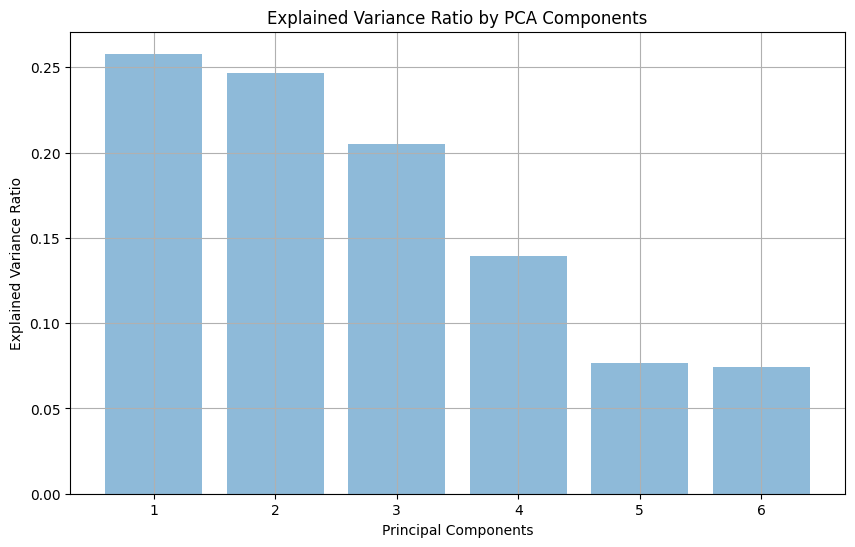

In [5]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA(n_components=None)  # Set n_components to None to keep all components

# Perform PCA on the normalized features
pca_features = pca.fit_transform(df[features_to_normalize])

# Create a DataFrame with the PCA components
pca_df = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(pca_features.shape[1])])

# Display the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()
print("Explained Variance Ratio:\n", explained_variance_ratio)
print("Cumulative Variance:\n", cumulative_variance)

# Plot the cumulative variance to decide the number of components to retain
import matplotlib.pyplot as plt

# Plot the explained variance ratio for each component
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.title('Explained Variance Ratio by PCA Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()



In [6]:
# Select a specific number of components based on the cumulative variance
n_components_to_retain = 5  # Example: retain components explaining 95% variance

# Perform PCA again with the selected number of components
pca = PCA(n_components=n_components_to_retain)
pca_features = pca.fit_transform(df[features_to_normalize])

# Create a DataFrame with the selected PCA components
pca_df = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(n_components_to_retain)])

# Check PCA components
print("Selected PCA Components Head:\n", pca_df.head())


Selected PCA Components Head:
         PC1       PC2       PC3       PC4       PC5
0  0.267674  0.098591 -0.442091  0.066147 -0.195486
1  0.491171 -0.404521 -0.410286 -0.010469 -0.276258
2  0.298977 -0.049048  0.015024  0.024333  0.018337
3 -0.391930 -0.187598  0.040428  0.307551 -0.328026
4 -0.057856 -0.270301  0.263201 -0.367197 -0.078210


In [7]:
# Save the results to CSV files
df.to_csv('data_normalized.csv', index=False)
pca_df.to_csv('data_pca.csv', index=False)